<a href="https://colab.research.google.com/github/Legendary-Nerd/House-Price-Prediction-ML/blob/main/Predict_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict house prices
Linear Regression

Supervised Learning

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### WorkFlow

Problem Definition

Data Collection

Data Preprocessing

Exploratory Data Analysis (EDA)

Feature Engineering

Model Selection

Model Training

Model Evaluation

Model Deployment

Monitoring & Maintenance

## House Price Prediction

In [2]:
# import data set
import kagglehub

path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.63k/4.63k [00:00<00:00, 6.51MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


In [4]:
import os
os.listdir(path)

['Housing.csv']

In [8]:
df = pd.read_csv(f'{path}/Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [42]:
df['mainroad'].value_counts()

,count
mainroad,
1,468
0,77


In [13]:
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['guestroom']

,guestroom
0,0
1,0
2,0
3,0
4,1
...,...
540,0
541,0
542,0
543,0


In [14]:
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement']

,basement
0,0
1,0
2,1
3,1
4,1
...,...
540,1
541,0
542,0
543,0


In [17]:
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning']

,airconditioning
0,1
1,1
2,0
3,1
4,1
...,...
540,0
541,0
542,0
543,0


In [18]:
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea']

,prefarea
0,1
1,0
2,1
3,1
4,0
...,...
540,0
541,0
542,0
543,0


In [19]:
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [20]:
df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 1 if x == 'furnished' else 2 if x=="semi-furnished" else 3)
df['furnishingstatus']

,furnishingstatus
0,1
1,1
2,2
3,1
4,1
...,...
540,3
541,2
542,3
543,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [22]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,2.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000


In [23]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<Axes: >

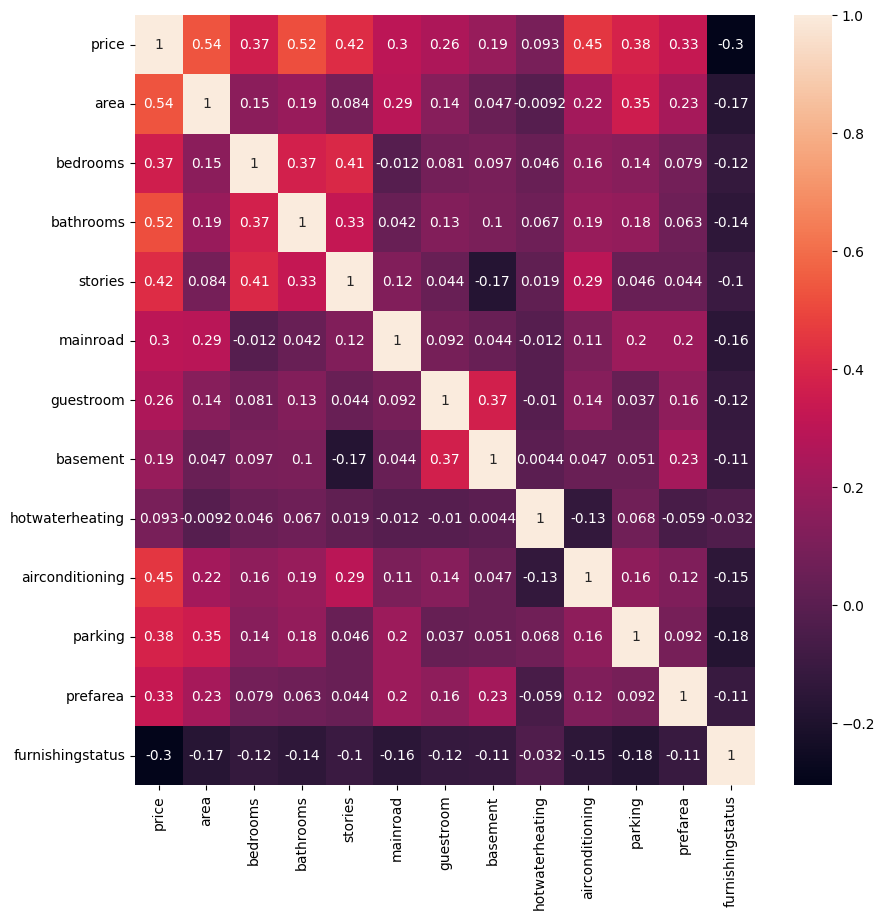

In [25]:
c = df.columns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [69]:
y = df['price']

In [94]:
x = pd.get_dummies(df, columns=['furnishingstatus', 'prefarea', 'mainroad',
                                 'guestroom', 'basement', 'hotwaterheating',
                                 'airconditioning'], drop_first=True)

# x = df[['area', 'bathrooms','stories','bedrooms','parking',"prefarea" ,'airconditioning',"mainroad" ,"guestroom" ,"basement","hotwaterheating","furnishingstatus"]]

In [95]:
model = linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)

LinearRegression()

In [96]:
model.score(x_test,y_test)

1.0

In [98]:
model.predict(x_test)[0]

np.float64(4060000.0)

In [99]:
y_test[0]

np.int64(13300000)

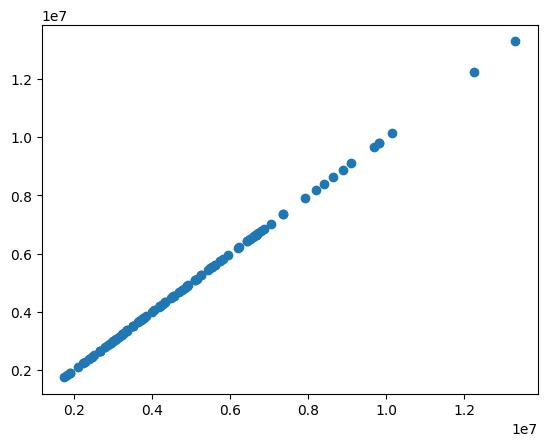

In [100]:
plt.scatter(y_test,model.predict(x_test))

In [91]:
df.head(7)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,2
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,2


In [93]:
/


()